In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [52]:
# Provide the file path
file_path = r"C:\Users\bappa\Documents\Kolkata_weather_data.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extract rows 1462 to 2192 (remember Python uses zero-based indexing)
data = df.iloc[1462:2193]  # Include 2192 by specifying 2193 as the end index

In [53]:
data.shape

(729, 25)

In [54]:
data.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
1462,"Kolkata,West Bengal,India",01/02/2021,14.4,25.0,19.0,11.7,65.34,NaN,5.8,NaN,...,1.7,0.0,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1463,"Kolkata,West Bengal,India",01/03/2021,13.0,26.1,19.2,13.0,69.17,NaN,4.7,NaN,...,1.7,0.0,1014.1,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1464,"Kolkata,West Bengal,India",01/04/2021,15.3,28.0,21.0,14.4,68.83,28.0,9.2,NaN,...,1.6,2.2,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1465,"Kolkata,West Bengal,India",01/05/2021,16.0,28.1,21.9,15.3,68.74,28.0,5.8,NaN,...,1.8,0.1,1014.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1466,"Kolkata,West Bengal,India",01/06/2021,16.8,29.2,22.7,16.2,69.08,29.6,5.8,NaN,...,1.7,0.0,1012.4,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


In [55]:
data["Conditions"].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Overcast'], dtype=object)

In [56]:
data.columns

Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Info', 'Conditions'],
      dtype='object')

In [57]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 1462 to 2190
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              729 non-null    object 
 1   Date time            729 non-null    object 
 2   Minimum Temperature  729 non-null    float64
 3   Maximum Temperature  729 non-null    float64
 4   Temperature          729 non-null    float64
 5   Dew Point            729 non-null    float64
 6   Relative Humidity    729 non-null    float64
 7   Heat Index           626 non-null    float64
 8   Wind Speed           729 non-null    float64
 9   Wind Gust            60 non-null     float64
 10  Wind Direction       729 non-null    float64
 11  Wind Chill           0 non-null      float64
 12  Precipitation        729 non-null    float64
 13  Precipitation Cover  729 non-null    float64
 14  Snow Depth           364 non-null    float64
 15  Visibility           729 

In [58]:
data = data.drop(columns=["Wind Gust"])


In [59]:
data = data.drop(columns=["Wind Chill"])


In [60]:
data = data.drop(columns=["Info"])

In [61]:
data = data.drop(columns=["Weather Type"])

In [62]:
data = data.drop(columns=["Latitude"])
data = data.drop(columns=["Longitude"])
data = data.drop(columns=["Resolved Address"])
data = data.drop(columns=["Name"])

In [63]:
data = data.drop(columns=["Snow Depth"])

In [64]:
data.head()

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions
1462,"Kolkata,West Bengal,India",01/02/2021,14.4,25.0,19.0,11.7,65.34,NaN,5.8,100.08,0.0,0.0,1.7,0.0,1015.6,Clear
1463,"Kolkata,West Bengal,India",01/03/2021,13.0,26.1,19.2,13.0,69.17,NaN,4.7,48.70,0.0,0.0,1.7,0.0,1014.1,Clear
1464,"Kolkata,West Bengal,India",01/04/2021,15.3,28.0,21.0,14.4,68.83,28.0,9.2,106.41,0.0,0.0,1.6,2.2,1014.7,Clear
1465,"Kolkata,West Bengal,India",01/05/2021,16.0,28.1,21.9,15.3,68.74,28.0,5.8,142.86,0.0,0.0,1.8,0.1,1014.6,Clear
1466,"Kolkata,West Bengal,India",01/06/2021,16.8,29.2,22.7,16.2,69.08,29.6,5.8,57.30,0.0,0.0,1.7,0.0,1012.4,Clear


In [65]:
data.shape

(729, 16)

In [66]:
# checking the number of missing values
print(data.isnull().sum())

Address                  0
Date time                0
Minimum Temperature      0
Maximum Temperature      0
Temperature              0
Dew Point                0
Relative Humidity        0
Heat Index             103
Wind Speed               0
Wind Direction           0
Precipitation            0
Precipitation Cover      0
Visibility               0
Cloud Cover              0
Sea Level Pressure       1
Conditions               0
dtype: int64


In [67]:
data["Heat Index"].unique()

array([ nan, 28. , 29.6, 31. , 29.1, 28.7, 29.4, 28.2, 26.3, 26.6, 27.2,
       27. , 26.5, 27.3, 28.5, 27.8, 29.8, 30. , 30.1, 28.1, 29.7, 31.3,
       32. , 32.5, 34.1, 33. , 34.7, 34.8, 30.8, 32.2, 35.3, 34.6, 33.7,
       35.7, 36. , 35.1, 37.8, 35.5, 33.9, 32.1, 35.2, 34.2, 36.9, 39.2,
       38.4, 37.7, 35.4, 34.9, 36.5, 38.6, 43.5, 46. , 42.1, 39.6, 41.9,
       40.6, 38.3, 36.7, 42. , 40.8, 41. , 43.2, 43.7, 39.3, 47.6, 45. ,
       37. , 40.5, 43.8, 46.3, 38.9, 42.5, 33.6, 41.5, 39.4, 45.3, 44.1,
       40.9, 48.7, 51. , 49.7, 51.7, 52. , 48.1, 46.7, 47.3, 47.9, 36.1,
       46.2, 49.5, 48.5, 48.2, 52.5, 42.3, 50.4, 42.4, 38.2, 34.5, 44.3,
       46.5, 53.6, 45.8, 46.9, 40.4, 36.8, 48.6, 38.8, 37.4, 53.1, 39.1,
       38.1, 32.9, 32.4, 30.4, 30.7, 35.8, 31.4, 31.9, 28.6, 29.5, 28.8,
       27.5, 27.9, 26.7, 27.7, 29.3, 32.7, 32.6, 31.6, 30.2, 31.7, 35.9,
       41.4, 41.2, 42.2, 43.6, 44.9, 44.7, 50.2, 43.3, 37.9, 43.4, 35.6,
       42.8, 44.2, 45.7, 41.3, 34.3, 42.6, 45.4, 44

In [68]:
data["Sea Level Pressure"].unique()

array([1015.6, 1014.1, 1014.7, 1014.6, 1012.4, 1011.5, 1011.9, 1011.8,
       1011.7, 1013. , 1013.8, 1014.5, 1012.7, 1012. , 1015.2, 1012.3,
       1011.3, 1013.5, 1015. , 1015.5, 1016. , 1015.1, 1017.1, 1018. ,
       1017.5, 1016.5, 1014.2, 1015.4, 1012.9,    nan, 1013.2, 1012.1,
       1014.9, 1016.1, 1014. , 1010.2, 1009. , 1006.7, 1007.2, 1008.4,
       1011.1, 1011.4, 1011. , 1009.8, 1009.3, 1010.8, 1010.9, 1011.2,
       1013.7, 1010.1, 1009.7, 1009.2, 1009.1, 1006.5, 1007.1, 1009.5,
       1010.3, 1008.7, 1008.9, 1008. , 1006.4, 1004.2,  999.4,  997.7,
       1000.9, 1004.5, 1007.5, 1008.6, 1007. , 1008.1, 1007.7, 1006.6,
       1006.8, 1008.5, 1006.1, 1006. , 1007.4, 1005.9, 1005.3, 1008.3,
       1006.9, 1008.2, 1007.3, 1005.4, 1003.6, 1003. , 1004.3, 1005.2,
       1004.7, 1004. , 1002.3, 1001.7,  996.6,  992.1,  997.5, 1004.9,
       1003.2, 1001.5, 1002.6, 1005.5, 1005.1, 1003.4, 1002. , 1001.1,
        999.9,  998.1,  996.3,  997.2,  997. ,  995.7,  995.1,  998.8,
      

In [69]:
# handle missing values
data["Sea Level Pressure"] = data["Sea Level Pressure"].fillna(data["Sea Level Pressure"].mode()[0]) # most frequent value
data["Heat Index"] = data["Heat Index"].fillna(data["Heat Index"].median())

In [70]:
# checking the number of missing values
print(data.isnull().sum())

Address                0
Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Dew Point              0
Relative Humidity      0
Heat Index             0
Wind Speed             0
Wind Direction         0
Precipitation          0
Precipitation Cover    0
Visibility             0
Cloud Cover            0
Sea Level Pressure     0
Conditions             0
dtype: int64


In [71]:
data["Conditions"].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy',
       'Rain, Overcast', 'Overcast'], dtype=object)

In [72]:
data = data.drop(columns=["Address"])
data = data.drop(columns=["Date time"])

In [73]:
# converting linguistic in value
data["Conditions"] = data["Conditions"].map({"Clear": 0, "Partially cloudy": 1,"Rain, Partially cloudy": 2,"Rain, Overcast": 3,"Overcast": 4})

In [74]:
data.head()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions
1462,14.4,25.0,19.0,11.7,65.34,40.6,5.8,100.08,0.0,0.0,1.7,0.0,1015.6,0
1463,13.0,26.1,19.2,13.0,69.17,40.6,4.7,48.70,0.0,0.0,1.7,0.0,1014.1,0
1464,15.3,28.0,21.0,14.4,68.83,28.0,9.2,106.41,0.0,0.0,1.6,2.2,1014.7,0
1465,16.0,28.1,21.9,15.3,68.74,28.0,5.8,142.86,0.0,0.0,1.8,0.1,1014.6,0
1466,16.8,29.2,22.7,16.2,69.08,29.6,5.8,57.30,0.0,0.0,1.7,0.0,1012.4,0


In [75]:
data.shape

(729, 14)

In [76]:
# setting plot style for all the plots
sns.set(style="whitegrid")

In [77]:
data.describe()

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,23.449108,31.389438,27.078464,22.000960,75.723841,39.882990,11.230453,154.415185,4.831440,4.572702,1.999314,46.697119,1007.251440,1.342936
std,4.755749,3.883985,4.087133,5.039049,9.862781,6.537234,5.105016,57.294545,14.458837,6.943955,0.392529,29.854545,5.529218,1.143704
min,11.000000,20.600000,16.600000,8.300000,41.150000,26.300000,3.400000,20.950000,0.000000,0.000000,0.700000,0.000000,992.000000,0.000000
25%,20.000000,29.000000,24.100000,17.500000,69.170000,34.900000,8.100000,113.820000,0.000000,0.000000,1.700000,18.000000,1003.000000,0.000000
50%,25.600000,32.000000,28.700000,24.400000,76.800000,40.600000,10.300000,154.250000,0.000000,0.000000,2.100000,51.000000,1006.900000,1.000000
75%,27.000000,34.000000,30.100000,26.200000,82.960000,44.300000,13.900000,190.880000,1.900000,8.330000,2.300000,71.200000,1011.900000,2.000000
max,29.700000,41.000000,33.200000,28.500000,96.010000,53.600000,64.400000,331.380000,156.860000,34.780000,3.200000,100.000000,1019.400000,4.000000


In [78]:
data.columns

Index(['Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed',
       'Wind Direction', 'Precipitation', 'Precipitation Cover', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Conditions'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

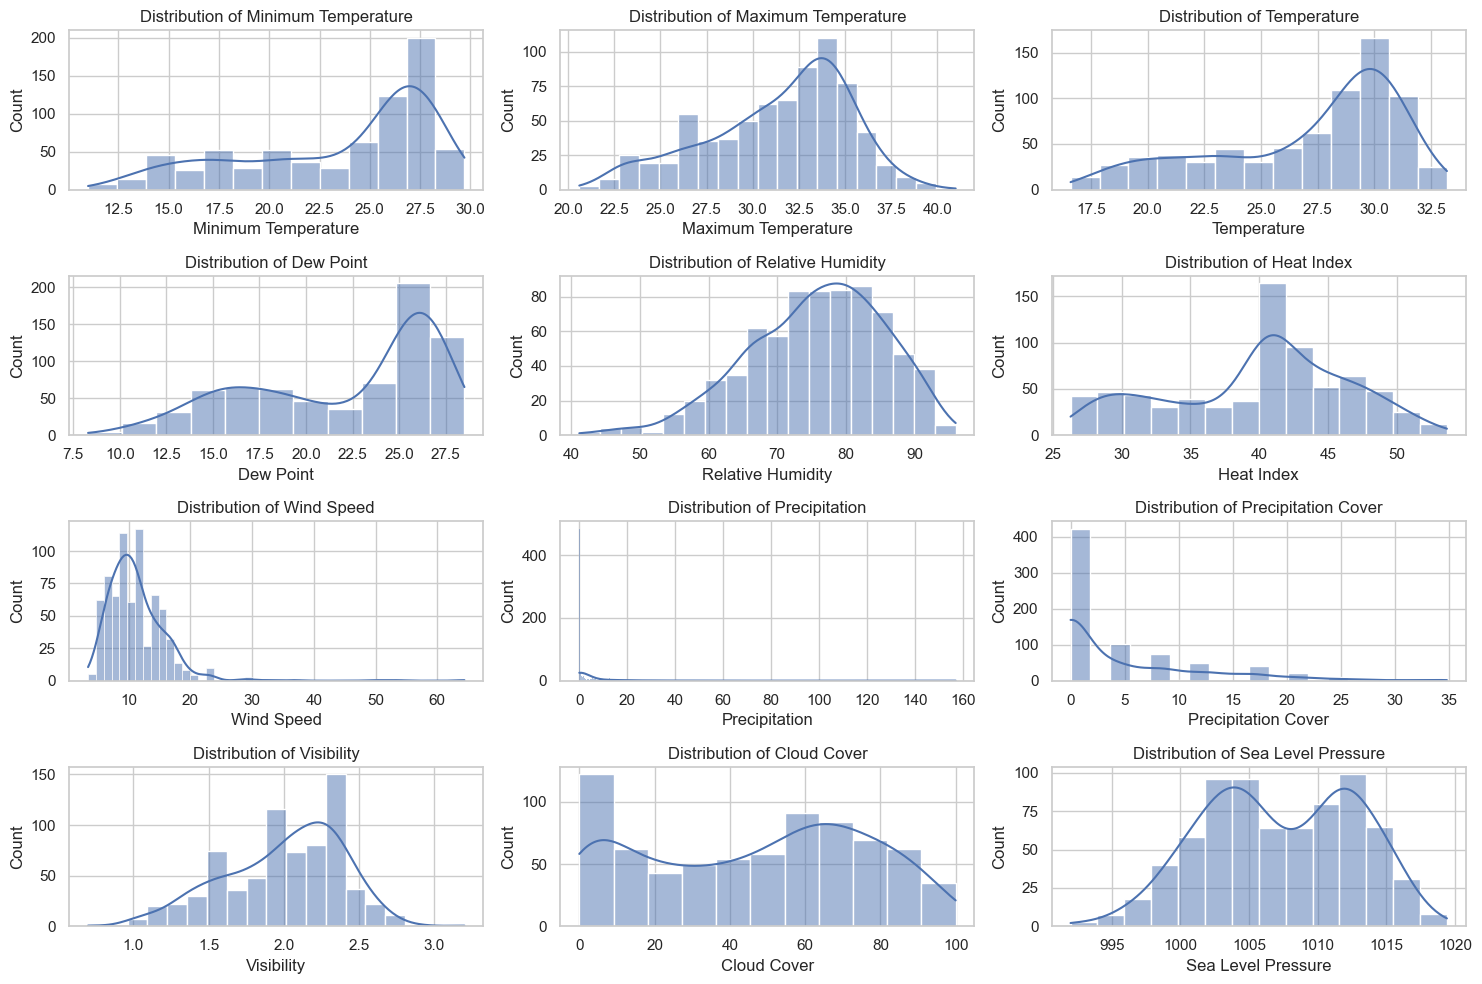

In [79]:
plt.figure(figsize=(15, 10))

# Increase grid size to accommodate all 14 columns
for i, column in enumerate(['Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed', 'Precipitation', 'Precipitation Cover', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure'], 1):
    plt.subplot(4, 3, i)  # Use a 5x3 grid for 15 subplots
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


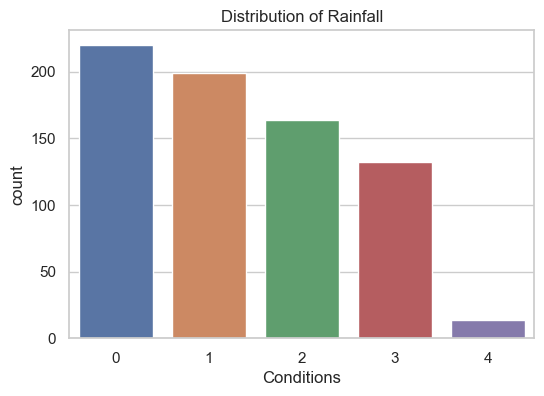

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Conditions", data=data)
plt.title("Distribution of Rainfall")
plt.show()

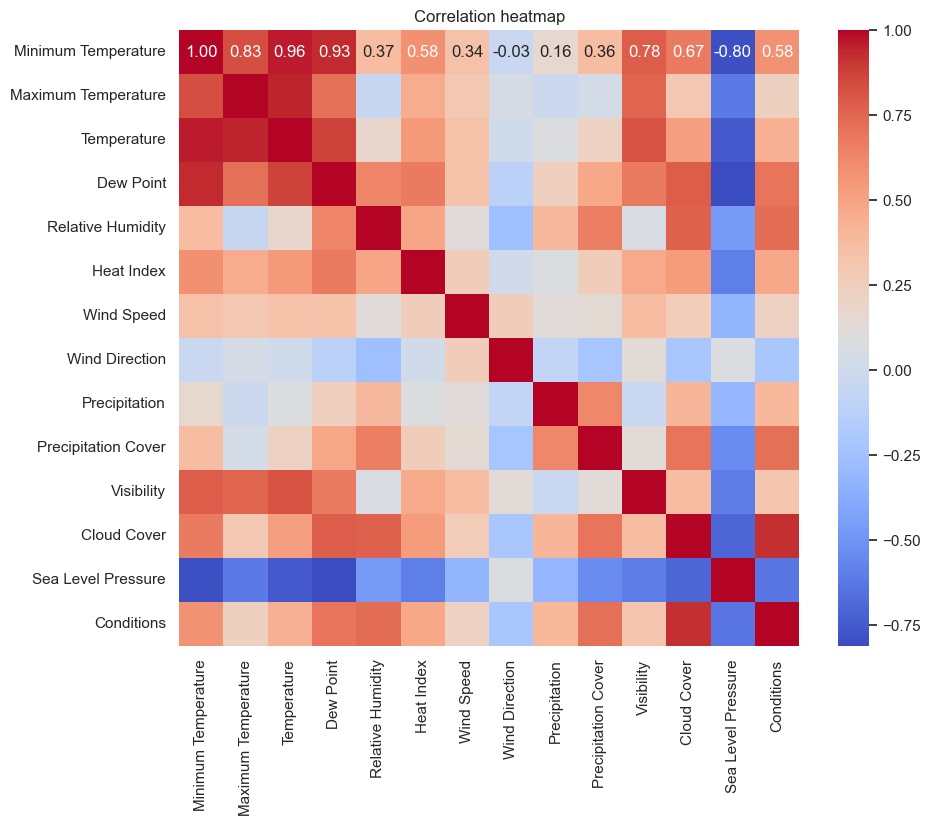

In [81]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

Number of outliers in Minimum Temperature: 0
Number of outliers in Maximum Temperature: 3
Number of outliers in Temperature: 0
Number of outliers in Dew Point: 0
Number of outliers in Relative Humidity: 7
Number of outliers in Heat Index: 0
Number of outliers in Wind Speed: 18
Number of outliers in Precipitation: 150
Number of outliers in Precipitation Cover: 39
Number of outliers in Visibility: 2
Number of outliers in Cloud Cover: 0
Number of outliers in Sea Level Pressure: 0


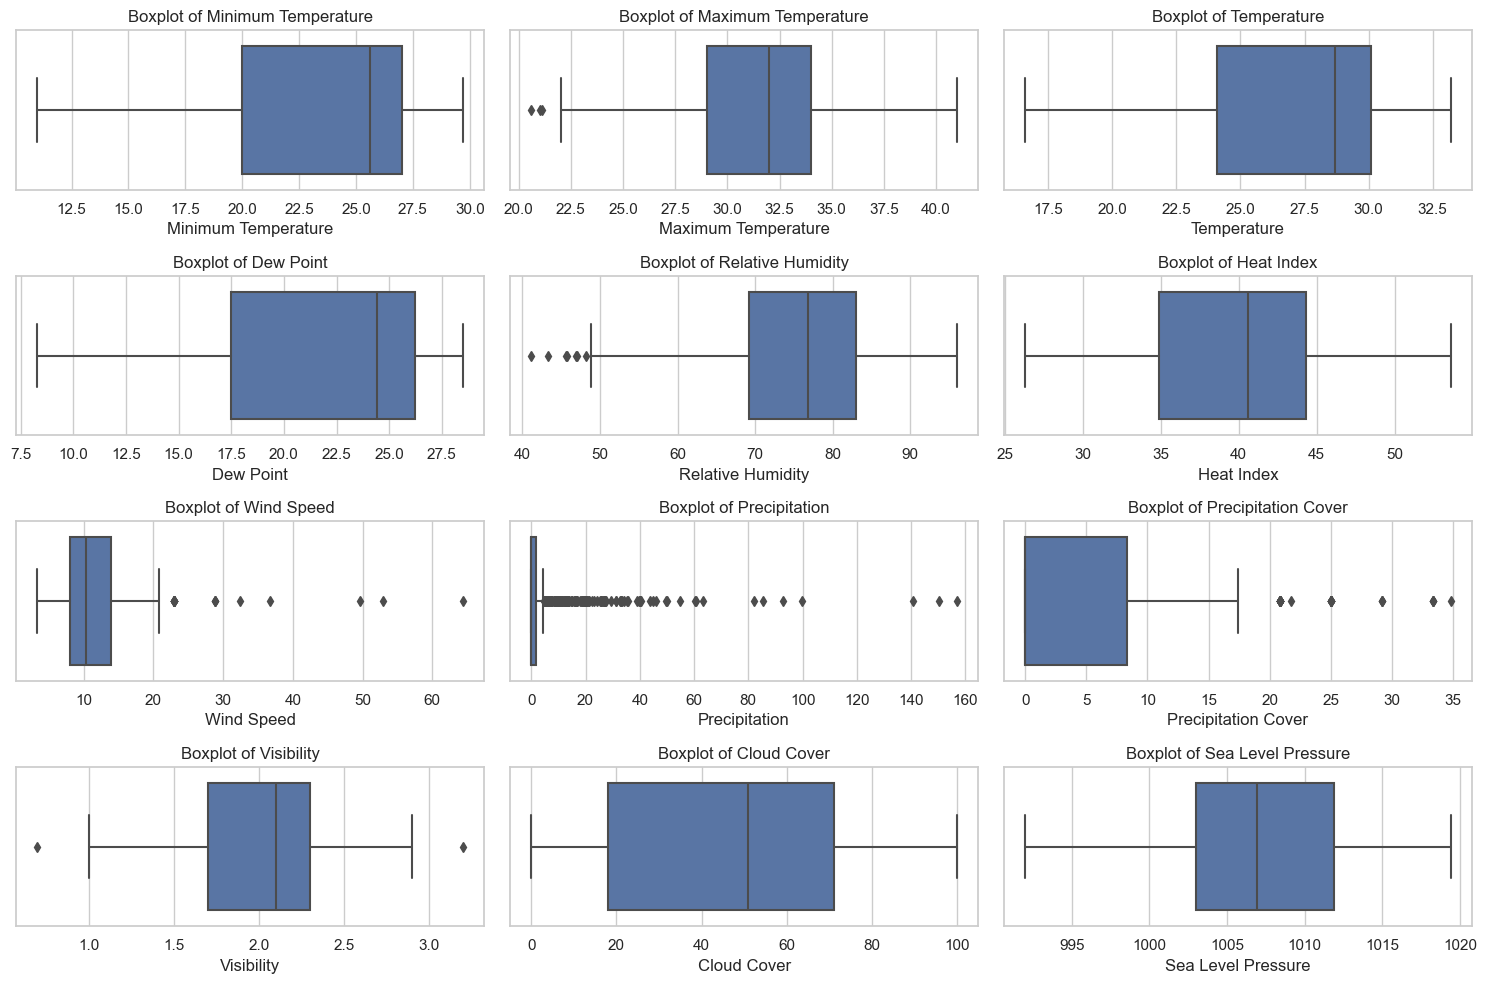

In [82]:
plt.figure(figsize=(15, 10))

# Loop over the columns and create a boxplot for each
for i, column in enumerate(['Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed', 'Precipitation', 
       'Precipitation Cover', 'Visibility', 'Cloud Cover', 'Sea Level Pressure'], 1):
    plt.subplot(4, 3, i)  # Create a 4x3 grid of subplots
    sns.boxplot(x=data[column])  # Pass the column data as x argument
    plt.title(f"Boxplot of {column}")
    
    # Calculate the IQR for the current column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = outliers.count()  # Count the number of outliers
    
    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {num_outliers}")

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


In [83]:
# Calculate the IQR for 'Wind Speed' column
Q1 = data['Wind Speed'].quantile(0.25)
Q3 = data['Wind Speed'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers in the 'Wind Speed' column
outliers = (data['Wind Speed'] < lower_bound) | (data['Wind Speed'] > upper_bound)

# Replace outliers in 'Wind Speed' with the median value
median_value = data['Wind Speed'].median()
data['Wind Speed'] = data['Wind Speed'].where(~outliers, median_value)

# Verify that the values are updated
print(f"Updated Wind Speed with outliers replaced by median:")
print(data['Wind Speed'].head())


Updated Wind Speed with outliers replaced by median:
1462    5.8
1463    4.7
1464    9.2
1465    5.8
1466    5.8
Name: Wind Speed, dtype: float64


Number of outliers in Minimum Temperature: 0
Number of outliers in Maximum Temperature: 3
Number of outliers in Temperature: 0
Number of outliers in Dew Point: 0
Number of outliers in Relative Humidity: 7
Number of outliers in Heat Index: 0
Number of outliers in Wind Speed: 4
Number of outliers in Precipitation: 150
Number of outliers in Precipitation Cover: 39
Number of outliers in Visibility: 2
Number of outliers in Cloud Cover: 0
Number of outliers in Sea Level Pressure: 0


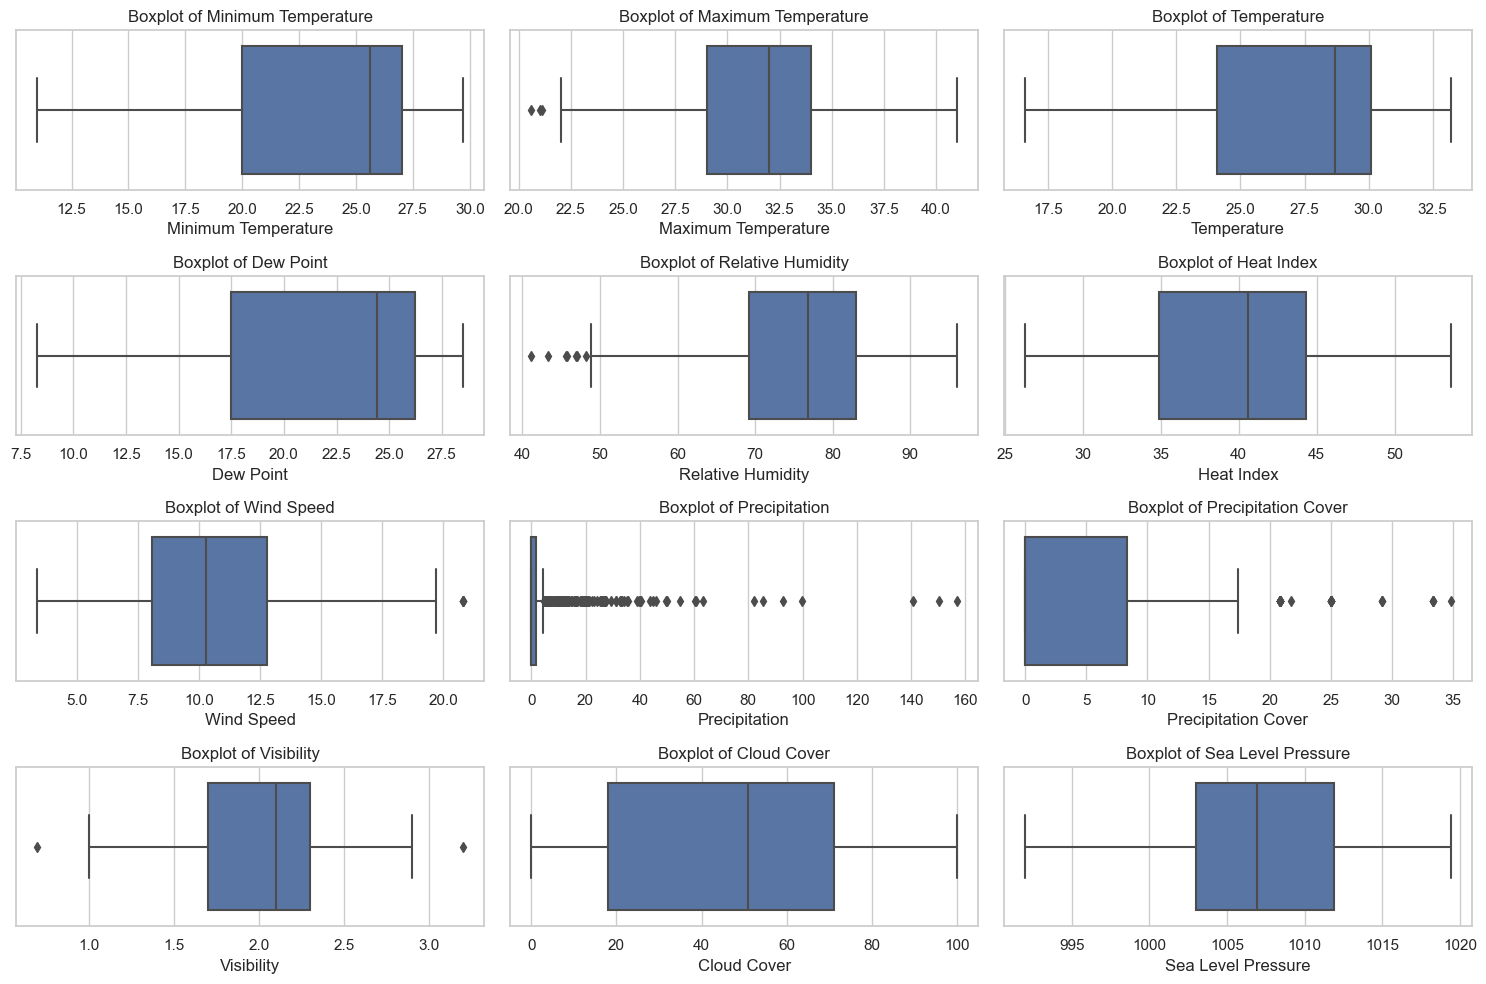

In [84]:
plt.figure(figsize=(15, 10))

# Loop over the columns and create a boxplot for each
for i, column in enumerate(['Minimum Temperature', 'Maximum Temperature', 'Temperature',
       'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed', 'Precipitation', 
       'Precipitation Cover', 'Visibility', 'Cloud Cover', 'Sea Level Pressure'], 1):
    plt.subplot(4, 3, i)  # Create a 4x3 grid of subplots
    sns.boxplot(x=data[column])  # Pass the column data as x argument
    plt.title(f"Boxplot of {column}")
    
    # Calculate the IQR for the current column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = outliers.count()  # Count the number of outliers
    
    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {num_outliers}")

plt.tight_layout()  # Adjust the spacing between plots
plt.show()


In [85]:
# drop highly correlated column
data = data.drop(columns=['Precipitation', 'Precipitation Cover', 'Minimum Temperature','Maximum Temperature'])

In [86]:
data.head()

,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Visibility,Cloud Cover,Sea Level Pressure,Conditions
1462,19.0,11.7,65.34,40.6,5.8,100.08,1.7,0.0,1015.6,0
1463,19.2,13.0,69.17,40.6,4.7,48.70,1.7,0.0,1014.1,0
1464,21.0,14.4,68.83,28.0,9.2,106.41,1.6,2.2,1014.7,0
1465,21.9,15.3,68.74,28.0,5.8,142.86,1.8,0.1,1014.6,0
1466,22.7,16.2,69.08,29.6,5.8,57.30,1.7,0.0,1012.4,0


In [87]:
print(data["Conditions"].value_counts())

Conditions
0    220
1    199
2    164
3    132
4     14
Name: count, dtype: int64


In [88]:
# Split features (X) and target (y)
x = data.drop(columns=["Conditions"])  # Features (excluding the target column)
y = data["Conditions"]  # Target variable

In [89]:
print(x)

      Temperature  Dew Point  Relative Humidity  Heat Index  Wind Speed  \
1462         19.0       11.7              65.34        40.6         5.8   
1463         19.2       13.0              69.17        40.6         4.7   
1464         21.0       14.4              68.83        28.0         9.2   
1465         21.9       15.3              68.74        28.0         5.8   
1466         22.7       16.2              69.08        29.6         5.8   
...           ...        ...                ...         ...         ...   
2186         24.9       21.0              80.08        32.0        10.3   
2187         22.7       18.1              76.56        27.7         9.2   
2188         20.0       11.5              60.60        40.6         6.9   
2189         20.2       13.6              67.41        40.6         5.8   
2190         21.1       16.0              74.46        27.5         6.9   

      Wind Direction  Visibility  Cloud Cover  Sea Level Pressure  
1462          100.08         1.

In [90]:
print(y)

1462    0
1463    0
1464    0
1465    0
1466    0
       ..
2186    1
2187    0
2188    0
2189    0
2190    0
Name: Conditions, Length: 729, dtype: int64


In [95]:
#weight balaning
# Calculate the class weights based on frequency (inverse of the class distribution)
class_weights = {
    0: 220 / 220,  # base weight for 0.00
    1: 220 / 199,  # inverse ratio for 0.25
    2: 220 / 164,  # inverse ratio for 0.75
    3: 220 / 132,  # inverse ratio for 1.00
    4: 220 / 14    # inverse ratio for 0.50
}

In [96]:
# splitting the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Model Training**

In [97]:
# Initialize RandomForestClassifier with the calculated class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Define the hyperparameter grid
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [98]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0,
                                                            1: 1.1055276381909547,
                                                            2: 1.3414634146341464,
                                                            3: 1.6666666666666667,
                                                            4: 15.714285714285714},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [99]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


**Model Evaluation**

In [101]:
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.86324786 0.84615385 0.87179487 0.88793103 0.88793103]
Mean cross-validation score: 0.8714117300324198


In [102]:
# test set performance
y_pred = best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.8835616438356164
Test set Confusion Matrix:
 [[49  0  0  0  0]
 [ 0 34  7  0  0]
 [ 0  5 21  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  5  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.87      0.83      0.85        41
           2       0.75      0.81      0.78        26
           3       0.83      1.00      0.91        25
           4       0.00      0.00      0.00         5

    accuracy                           0.88       146
   macro avg       0.69      0.73      0.71       146
weighted avg       0.86      0.88      0.87       146



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 required over sampling (***Needed to be done***)
)

***Prediction on unknown data***

In [107]:
input_data = (21.6, 17.2, 78, 5.8, 160, 135, 2.6,49,1013.25)

input_df = pd.DataFrame([input_data], columns=['Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index', 'Wind Speed', 'Wind Direction', 'Visibility', 'Cloud Cover', 'Sea Level Pressure'])

In [108]:
prediction = best_rf_model.predict(input_df)

In [109]:
print(prediction)

[1]


In [110]:
# Define a mapping from numeric values back to the corresponding conditions
condition_map = {
    0: "Clear",
    1: "Partially cloudy",
    2: "Rain, Partially cloudy",
    3: "Rain, Overcast",
    4: "Overcast"
}

# Predict using the trained model
prediction = best_rf_model.predict(input_df)

# Convert the numerical prediction back to the corresponding category
predicted_condition = condition_map[prediction[0]]

print("Prediction result:", predicted_condition)


Prediction result: Partially cloudy
